In [68]:
#import thinkplot
#import thinkstats2
import pandas as pd
import numpy as np
import math
import scipy.stats as ss
import thinkplot
import thinkstats2

##Seaborn for fancy plots. 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,5)

<h1>Example formatting in HTML - This is a big headline!</h1>
<h2>Edit this cell to see them - This is a smaller headline<h2>
<hr>
<b>Things can be bold....</b>

<i>Or italic</i>
<ul>
<li>Things can be in a list
<li>all sorts of things!
</ul>

<ol>
<li>Lists can have numbers
<li>they count automatically!
</ol>



<h1>Assignment 2: Life Expectancy and You!</h1>

<b>Instructions:</b>
<ul>
<li>Use the worksheet below to act as a guide to exploring and examining the data in the dataset.
<li>Try to make things easy to read. Look at the formatting stuff above. 
<li>As long as you do what is asked, you can do things in many different ways. You may need to do a little searching. 
</ul>

In [69]:
#Load data and do some cleanup before starting
#Please don't change this stuff. 
dfLE = pd.read_csv("led.csv")
dfLE.rename(columns={"Status":"isDeveloped", }, inplace=True)
dfLE["isDeveloped"].replace(('Developed', 'Developing'), (1, 0), inplace=True)
dfLE = dfLE.drop(columns={"Year", "Incomecompositionofresources", "thinness5-9years", "HIV/AIDS", "percentageexpenditure", "Totalexpenditure", "thinness1-19years"})
dfLE = dfLE.groupby("Country", as_index=False).mean()
dfLE.head()


,Country,isDeveloped,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling
0,Afghanistan,0.0,58.19375,269.0625,78.2500,0.014375,64.562500,2362.2500,15.51875,107.5625,48.3750,52.3125,340.015425,9.972260e+06,8.21250
1,Albania,0.0,75.15625,45.0625,0.6875,4.848750,98.000000,53.3750,49.06875,0.9375,98.1250,98.0625,2119.726679,6.969116e+05,12.13750
2,Algeria,0.0,73.61875,108.1875,20.3125,0.406667,78.000000,1943.8750,48.74375,23.5000,91.7500,91.8750,2847.853392,2.164983e+07,12.71250
3,Angola,0.0,49.01875,328.5625,83.7500,5.740667,70.222222,3561.3125,18.01875,132.6250,46.1250,47.6875,1975.143045,1.014710e+07,8.04375
4,AntiguaandBarbuda,0.0,75.05625,127.5000,0.0000,7.949333,98.266667,0.0000,38.42500,0.0000,96.9375,98.3125,9759.305728,NaN,8.84375


<h2>Part 1: Add a column for GDP per Capita (5pts)</h2>

Note: you'll have to look at the units to ensure you get it right. 

In [70]:
#Part 1
gdp = dfLE["GDP"]
gdp = gdp.apply(lambda x:x * 1000000)
gdpCap = gdp / dfLE["Population"]
gdpCap
dfLE["GDP Per capita"] = gdpCap
dfLE.head()



,Country,isDeveloped,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling,GDP Per capita
0,Afghanistan,0.0,58.19375,269.0625,78.2500,0.014375,64.562500,2362.2500,15.51875,107.5625,48.3750,52.3125,340.015425,9.972260e+06,8.21250,34.096126
1,Albania,0.0,75.15625,45.0625,0.6875,4.848750,98.000000,53.3750,49.06875,0.9375,98.1250,98.0625,2119.726679,6.969116e+05,12.13750,3041.600402
2,Algeria,0.0,73.61875,108.1875,20.3125,0.406667,78.000000,1943.8750,48.74375,23.5000,91.7500,91.8750,2847.853392,2.164983e+07,12.71250,131.541621
3,Angola,0.0,49.01875,328.5625,83.7500,5.740667,70.222222,3561.3125,18.01875,132.6250,46.1250,47.6875,1975.143045,1.014710e+07,8.04375,194.651004
4,AntiguaandBarbuda,0.0,75.05625,127.5000,0.0000,7.949333,98.266667,0.0000,38.42500,0.0000,96.9375,98.3125,9759.305728,NaN,8.84375,NaN


In [57]:
gdpCap.describe().apply(lambda x : format(x, 'f'))


count        144.000000
mean       69740.112787
std       561366.132621
min            1.988100
25%          112.586791
50%          744.342960
75%         6091.360633
max      6616857.431507
dtype: object

<h2>Part 2: Print a visualization of each distribution. Both regular (density) and cumulative. (15pts)</h2>
Print each distribution is some type of visualization, also print the cumulative distribution. 
<ul>
<li>5 points are for using some visualization that is effective.
<li>5 points for formatting things in a nice layout. Hint: for whatever chart you use, look into some formatting options
<li>5 points are for doing it in an efficient way - just listing off each column is lots of typing...
</ul>

C:\Users\soniy\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\soniy\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\soniy\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

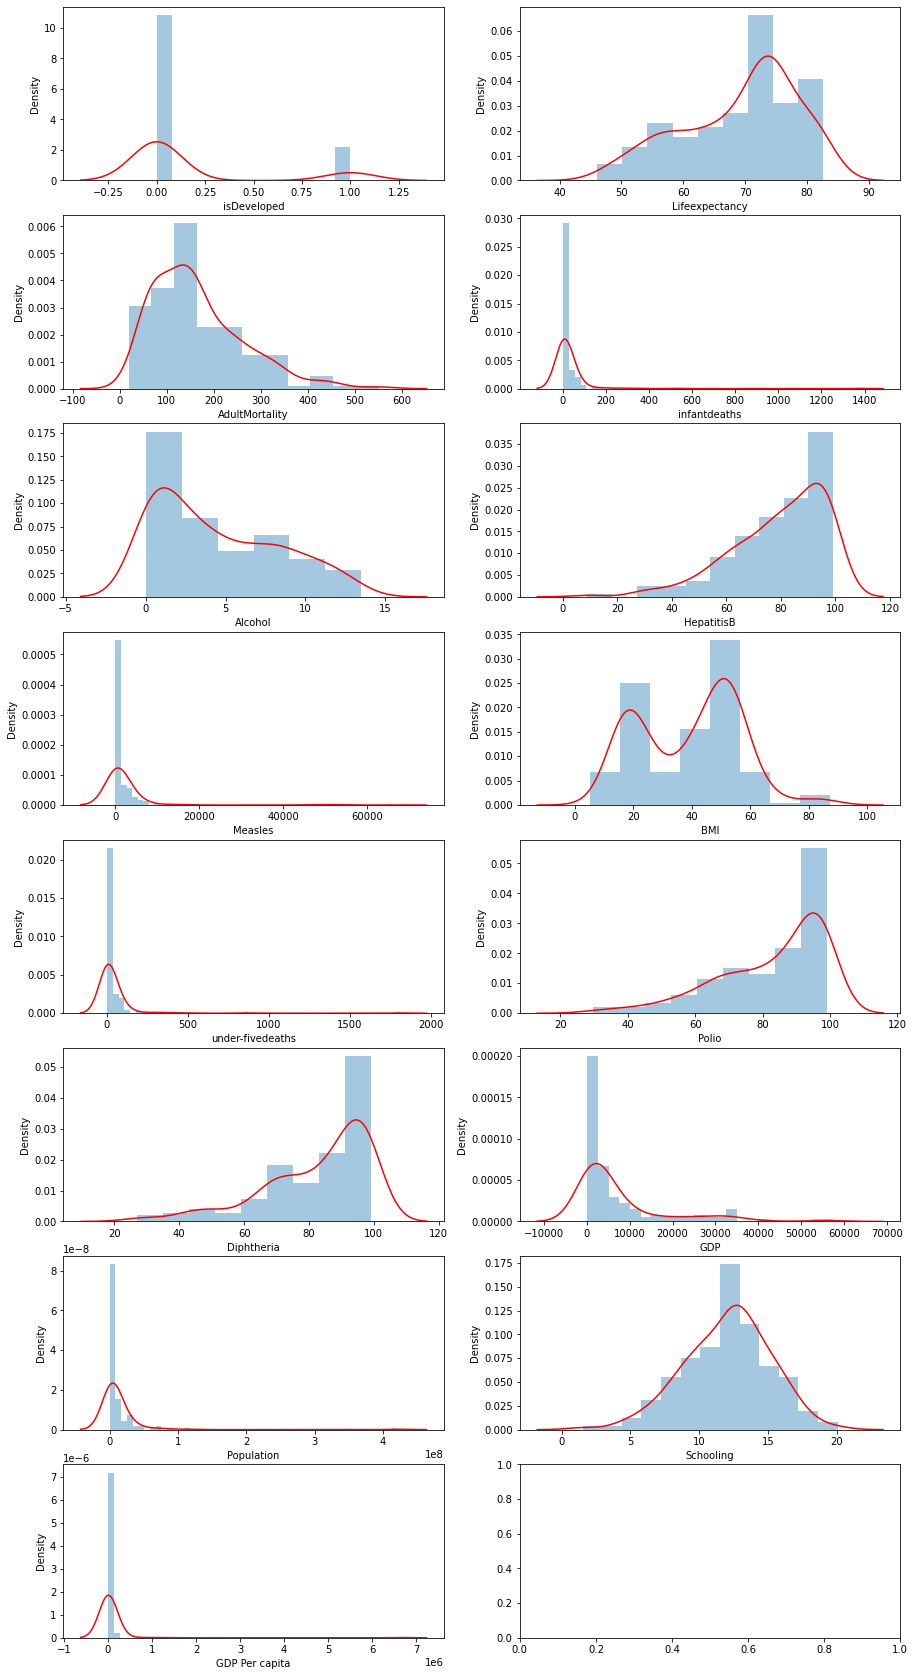

In [58]:
#Print all distributions
fig, ax = plt.subplots(8,2)
sns.distplot(dfLE["isDeveloped"], kde_kws={"color":"red", "label":"KDE"}, hist_kws={"label":"Data"}, ax=ax[0, 0])
sns.distplot(dfLE["Lifeexpectancy"], kde_kws={"color":"red", "label":"KDE"}, hist_kws={"label":"Data"}, ax=ax[0, 1])
sns.distplot(dfLE["AdultMortality"], kde_kws={"color":"red", "label":"KDE"}, hist_kws={"label":"Data"}, ax=ax[1, 0])
sns.distplot(dfLE["infantdeaths"], kde_kws={"color":"red", "label":"KDE"}, hist_kws={"label":"Data"}, ax=ax[1, 1])
sns.distplot(dfLE["Alcohol"], kde_kws={"color":"red", "label":"KDE"}, hist_kws={"label":"Data"}, ax=ax[2, 0])
sns.distplot(dfLE["HepatitisB"], kde_kws={"color":"red", "label":"KDE"}, hist_kws={"label":"Data"}, ax=ax[2, 1])
sns.distplot(dfLE["Measles"], kde_kws={"color":"red", "label":"KDE"}, hist_kws={"label":"Data"}, ax=ax[3, 0])
sns.distplot(dfLE["BMI"], kde_kws={"color":"red", "label":"KDE"}, hist_kws={"label":"Data"}, ax=ax[3, 1])
sns.distplot(dfLE["under-fivedeaths"], kde_kws={"color":"red", "label":"KDE"}, hist_kws={"label":"Data"}, ax=ax[4, 0])
sns.distplot(dfLE["Polio"], kde_kws={"color":"red", "label":"KDE"}, hist_kws={"label":"Data"}, ax=ax[4, 1])
sns.distplot(dfLE["Diphtheria"], kde_kws={"color":"red", "label":"KDE"}, hist_kws={"label":"Data"}, ax=ax[5, 0])
sns.distplot(dfLE["GDP"], kde_kws={"color":"red", "label":"KDE"}, hist_kws={"label":"Data"}, ax=ax[5, 1])
sns.distplot(dfLE["Population"], kde_kws={"color":"red", "label":"KDE"}, hist_kws={"label":"Data"}, ax=ax[6, 0])
sns.distplot(dfLE["Schooling"], kde_kws={"color":"red", "label":"KDE"}, hist_kws={"label":"Data"}, ax=ax[6, 1])
sns.distplot(dfLE["GDP Per capita"], kde_kws={"color":"red", "label":"KDE"}, hist_kws={"label":"Data"}, ax=ax[7, 0])
plt.show()

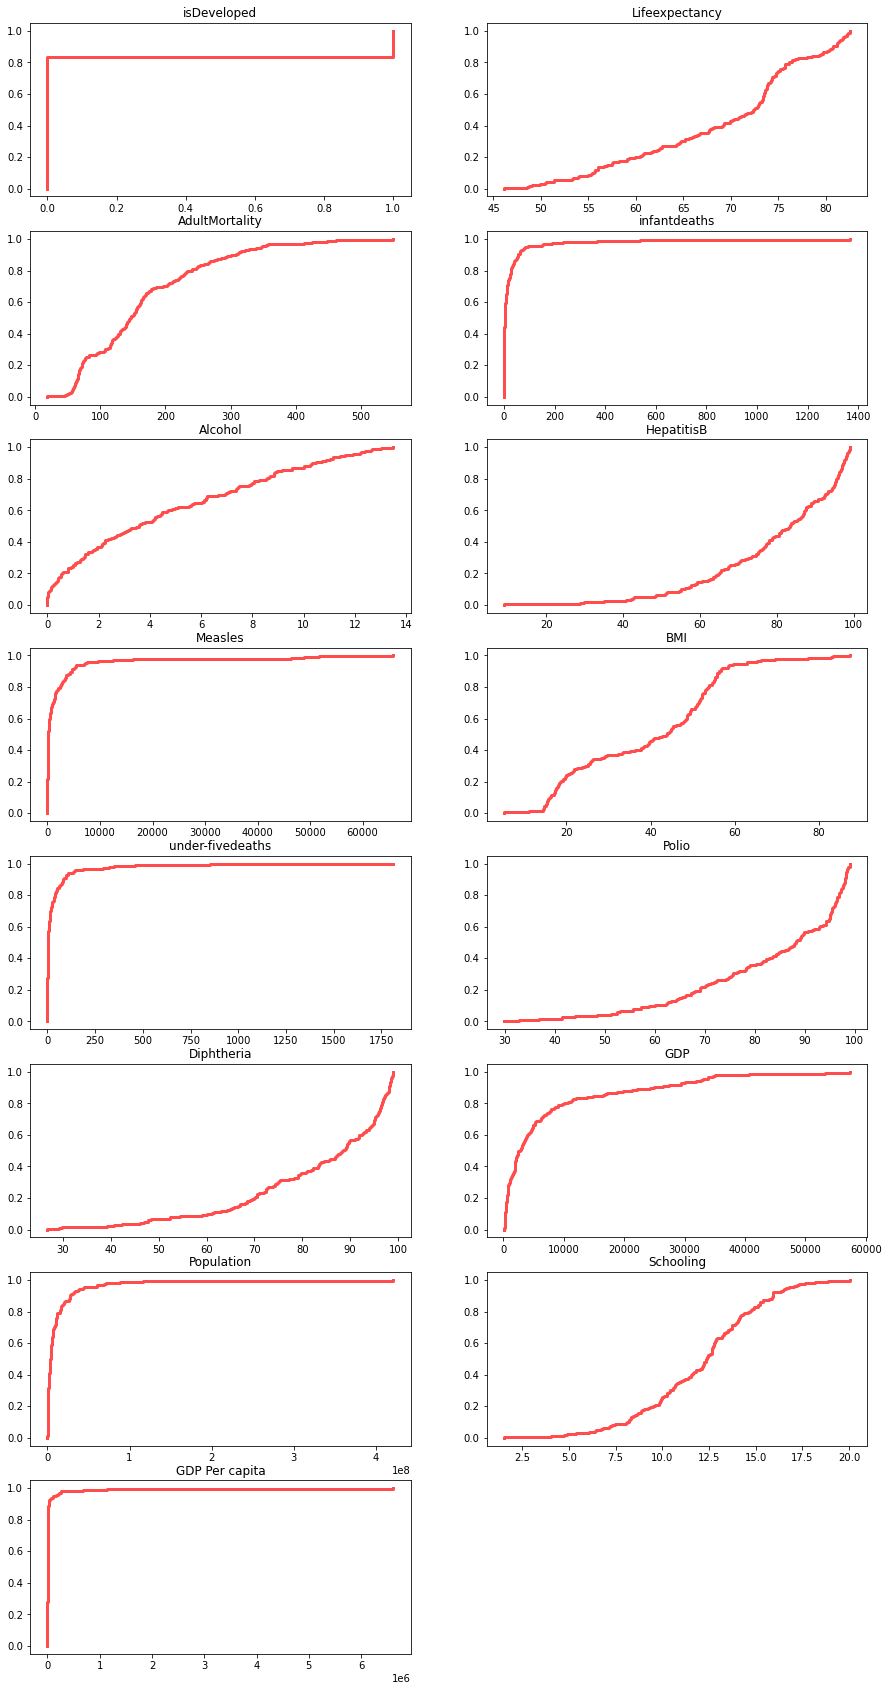

In [59]:
# Cumulative distribution
cdf1 = thinkstats2.Cdf(dfLE["isDeveloped"])
cdf2 = thinkstats2.Cdf(dfLE["Lifeexpectancy"])
cdf3 = thinkstats2.Cdf(dfLE["AdultMortality"])
cdf4 = thinkstats2.Cdf(dfLE["infantdeaths"])
cdf5 = thinkstats2.Cdf(dfLE["Alcohol"])
cdf6 = thinkstats2.Cdf(dfLE["HepatitisB"])
cdf7 = thinkstats2.Cdf(dfLE["Measles"])
cdf8 = thinkstats2.Cdf(dfLE["BMI"])
cdf9 = thinkstats2.Cdf(dfLE["under-fivedeaths"])
cdf10 = thinkstats2.Cdf(dfLE["Polio"])
cdf11 = thinkstats2.Cdf(dfLE["Diphtheria"])
cdf12 = thinkstats2.Cdf(dfLE["GDP"])
cdf13 = thinkstats2.Cdf(dfLE["Population"])
cdf14 = thinkstats2.Cdf(dfLE["Schooling"])
cdf15 = thinkstats2.Cdf(dfLE["GDP Per capita"])

thinkplot.PrePlot(15, 8, 2)
thinkplot.subplot(1, title="isDeveloped")
thinkplot.Cdf(cdf1, color="red")
thinkplot.subplot(2, title="Lifeexpectancy")
thinkplot.Cdf(cdf2, color="red")
thinkplot.subplot(3, title="AdultMortality")
thinkplot.Cdf(cdf3, color="red")
thinkplot.subplot(4, title="infantdeaths")
thinkplot.Cdf(cdf4, color="red")
thinkplot.subplot(5, title="Alcohol")
thinkplot.Cdf(cdf5, color="red")
thinkplot.subplot(6, title="HepatitisB")
thinkplot.Cdf(cdf6, color="red")
thinkplot.subplot(7, title="Measles")
thinkplot.Cdf(cdf7, color="red")
thinkplot.subplot(8, title="BMI")
thinkplot.Cdf(cdf8, color="red")
thinkplot.subplot(9, title="under-fivedeaths")
thinkplot.Cdf(cdf9, color="red")
thinkplot.subplot(10, title="Polio")
thinkplot.Cdf(cdf10, color="red")
thinkplot.subplot(11, title="Diphtheria")
thinkplot.Cdf(cdf11, color="red")
thinkplot.subplot(12, title="GDP")
thinkplot.Cdf(cdf12, color="red")
thinkplot.subplot(13, title="Population")
thinkplot.Cdf(cdf13, color="red")
thinkplot.subplot(14, title="Schooling")
thinkplot.Cdf(cdf14, color="red")
thinkplot.subplot(15, title="GDP Per capita")
thinkplot.Cdf(cdf15, color="red")

thinkplot.Config()


C:\Users\soniy\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\soniy\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\soniy\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

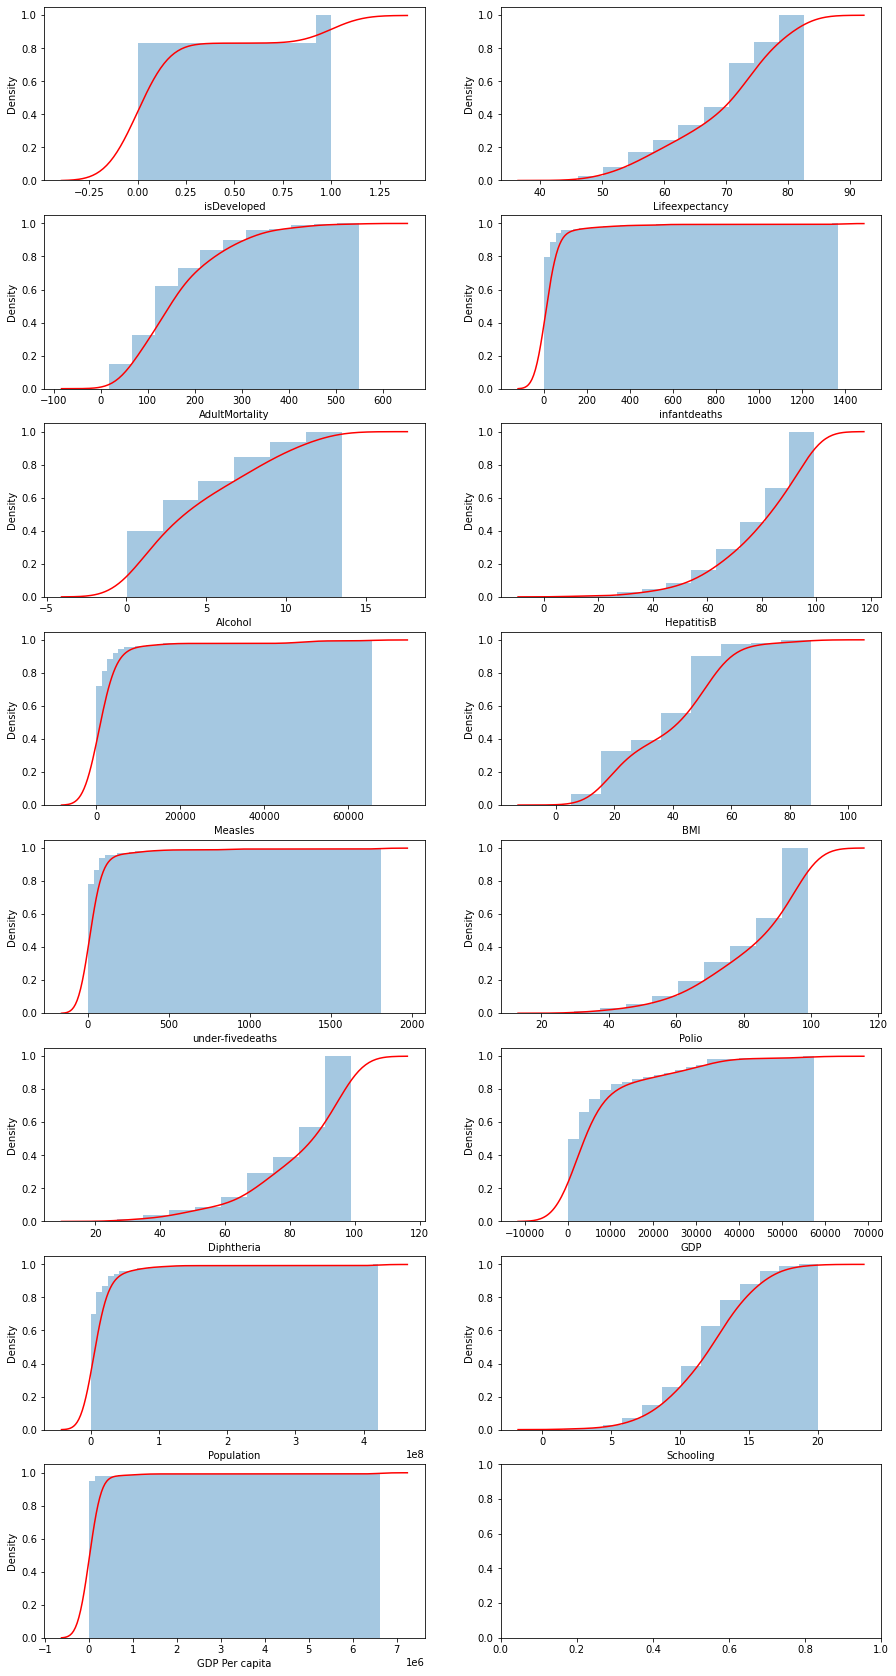

In [60]:
# density and cumulative distributions together
fig, ax = plt.subplots(8,2)
sns.distplot(dfLE["isDeveloped"], kde_kws={'cumulative': True, "color":"red"}, hist_kws={'cumulative': True}, ax=ax[0, 0])
sns.distplot(dfLE["Lifeexpectancy"], kde_kws={'cumulative': True, "color":"red"}, hist_kws={'cumulative': True}, ax=ax[0, 1])
sns.distplot(dfLE["AdultMortality"], kde_kws={'cumulative': True, "color":"red"}, hist_kws={'cumulative': True}, ax=ax[1, 0])
sns.distplot(dfLE["infantdeaths"], kde_kws={'cumulative': True, "color":"red"}, hist_kws={'cumulative': True}, ax=ax[1, 1])
sns.distplot(dfLE["Alcohol"], kde_kws={'cumulative': True, "color":"red"}, hist_kws={'cumulative': True}, ax=ax[2, 0])
sns.distplot(dfLE["HepatitisB"], kde_kws={'cumulative': True, "color":"red"}, hist_kws={'cumulative': True}, ax=ax[2, 1])
sns.distplot(dfLE["Measles"], kde_kws={'cumulative': True, "color":"red"}, hist_kws={'cumulative': True}, ax=ax[3, 0])
sns.distplot(dfLE["BMI"], kde_kws={'cumulative': True, "color":"red"}, hist_kws={'cumulative': True}, ax=ax[3, 1])
sns.distplot(dfLE["under-fivedeaths"], kde_kws={'cumulative': True, "color":"red"}, hist_kws={'cumulative': True}, ax=ax[4, 0])
sns.distplot(dfLE["Polio"], kde_kws={'cumulative': True, "color":"red"}, hist_kws={'cumulative': True}, ax=ax[4, 1])
sns.distplot(dfLE["Diphtheria"], kde_kws={'cumulative': True, "color":"red"}, hist_kws={'cumulative': True}, ax=ax[5, 0])
sns.distplot(dfLE["GDP"], kde_kws={'cumulative': True, "color":"red"}, hist_kws={'cumulative': True}, ax=ax[5, 1])
sns.distplot(dfLE["Population"], kde_kws={'cumulative': True, "color":"red"}, hist_kws={'cumulative': True}, ax=ax[6, 0])
sns.distplot(dfLE["Schooling"], kde_kws={'cumulative': True, "color":"red"}, hist_kws={'cumulative': True}, ax=ax[6, 1])
sns.distplot(dfLE["GDP Per capita"], kde_kws={'cumulative': True, "color":"red"}, hist_kws={'cumulative': True}, ax=ax[7, 0])
plt.show()

<h2>Create an analytical distribution for SCHOOLING, and use it for a couple of things. (20pts)</h2>
<ul>
<li>5 points are for choosing an appropriate distribution. Please state it clearly somewhere.
<li>10 points are for creating and visualizing the distribution. Do it without using a fit() method. Plot the emperical data on the same graph. 
<li>5 points are for using the distribution to predict the percentage of that have a schooling level within 1 year of Canada. 

In [72]:
dfLE["Schooling"].describe()

count    178.000000
mean      12.027739
std        3.104852
min        1.531250
25%        9.971875
50%       12.359375
75%       14.093750
max       20.037500
Name: Schooling, dtype: float64

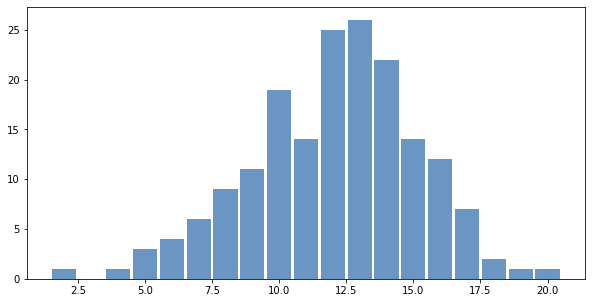

In [91]:
# histogram
schoolhist = thinkstats2.Hist(round(dfLE["Schooling"], 0))
thinkplot.PrePlot(1)
thinkplot.Hist(schoolhist)
thinkplot.Config()

The histogram of Schooling shows that it is kind of normal. 

<AxesSubplot:xlabel='Schooling', ylabel='Count'>

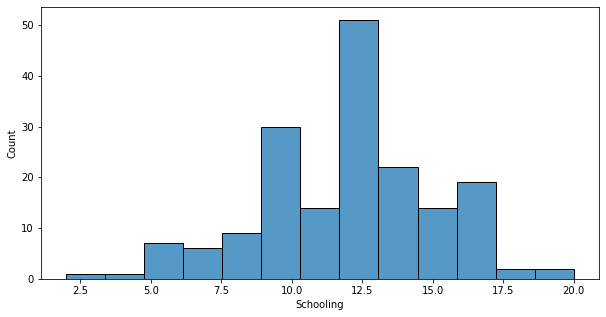

In [93]:
sns.histplot(round(dfLE["Schooling"],0))

In [94]:
round(dfLE["Schooling"], 0).value_counts().sort_index()

2.0      1
4.0      1
5.0      3
6.0      4
7.0      6
8.0      9
9.0     11
10.0    19
11.0    14
12.0    25
13.0    26
14.0    22
15.0    14
16.0    12
17.0     7
18.0     2
19.0     1
20.0     1
Name: Schooling, dtype: int64

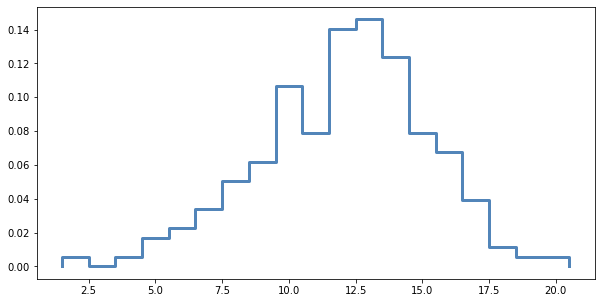

In [76]:
# pmf
schoolpmf = thinkstats2.Pmf(round(dfLE["Schooling"]))
thinkplot.PrePlot(1)
thinkplot.Pmf(schoolpmf)
thinkplot.Config()

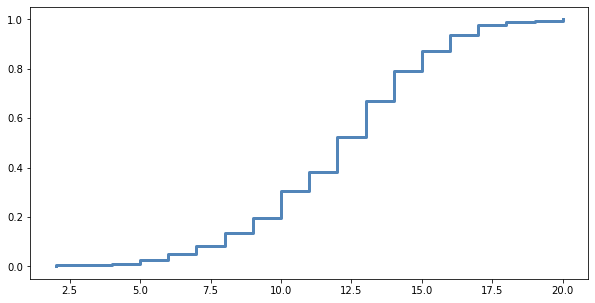

In [77]:
# cdf
schoolcdf = thinkstats2.Cdf(round(dfLE["Schooling"]))
thinkplot.PrePlot(1)
thinkplot.Cdf(schoolcdf)
thinkplot.Config()

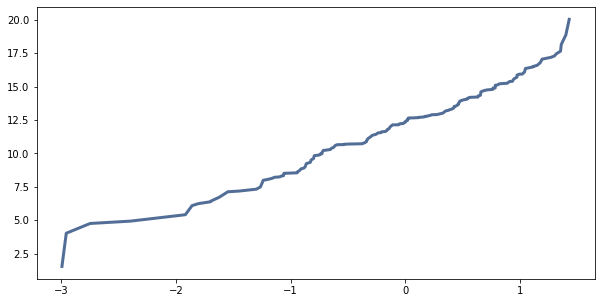

In [78]:
thinkstats2.NormalProbabilityPlot(dfLE["Schooling"])

From the normal probability plot, it is clear that it fits in normal distribution. The plot is mostly straight line or linear, especially around mean value.

In [42]:
#Analytical for Schooling
mu = dfLE["Schooling"].mean()
sigma = dfLE["Schooling"].std()
normz = ss.norm(mu, sigma)

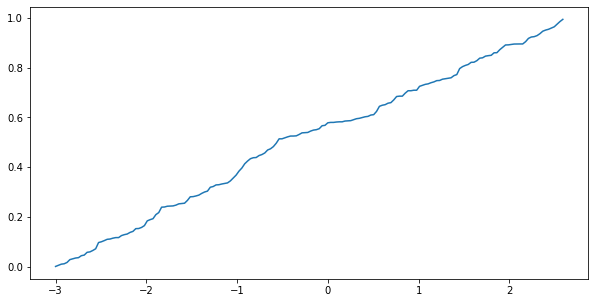

In [45]:
data = np.sort(dfLE["Schooling"])
x = np.linspace(-3,3, 191)
plt.plot(x,normz.cdf(data))

plt.show()

The analytical modelling perfectly matches with the normal distribution. 

In [92]:
dfLE[dfLE["Country"] == "Canada"]

,Country,isDeveloped,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling,GDP Per capita
30,Canada,0.0,81.6875,64.625,2.0,8.053333,28.846154,129.5,55.8625,2.0,85.3125,91.0625,29382.907523,1.136405e+07,15.875,2585.600879


In [93]:
# using the distribution to predict the percentage of that have a schooling level within 1 year of Canada. 
# schooling of Canada is 15.875
Val = normz.cdf(15.875)
print("%.2f %% "%(Val * 100))


89.23 % 


C:\Users\soniy\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


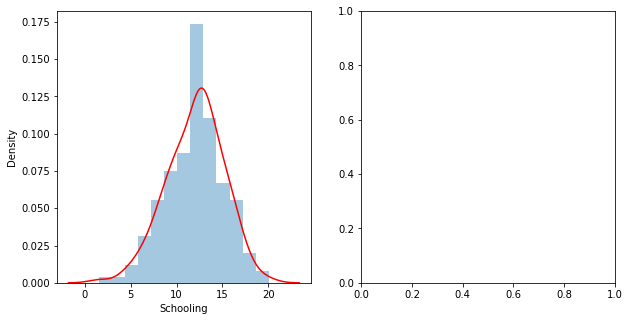

In [94]:
fig, ax = plt.subplots(1,2)
sns.distplot(dfLE["Schooling"], kde_kws={"color":"red", "label":"KDE"}, hist_kws={"label":"Data"}, ax=ax[0])
plt.show()

<h2>Part 3: Create another analytical distribution for GDP per Capita (20pts)</h2>
<ul>
<li>5 points are for choosing an appropriate distribution. Please state it clearly somewhere.
<li>10 points are for creating and visualizing it alongside the emperical. You have free reign on how. 
<li>5 points are for using the analytical distribution to evaluate the quality of your GDP per capita metric - does it appear accurate? Why or why not?
<li>If you've judged GDP per cap to be unreliable, drop it. 

In [139]:
#Analytical for GDP/capita
dfLE["GDP Per capita"].describe().apply(lambda x : format(x, 'f'))


count        144.000000
mean       69740.112787
std       561366.132621
min            1.988100
25%          112.586791
50%          744.342960
75%         6091.360633
max      6616857.431507
Name: GDP Per capita, dtype: object

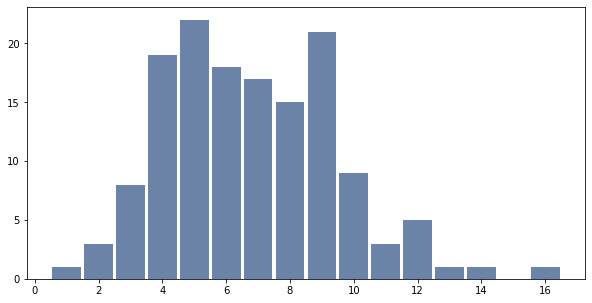

In [106]:
gdpHist = thinkstats2.Hist(round(np.log(dfLE["GDP Per capita"])))
thinkplot.Hist(gdpHist)
thinkplot.Config()

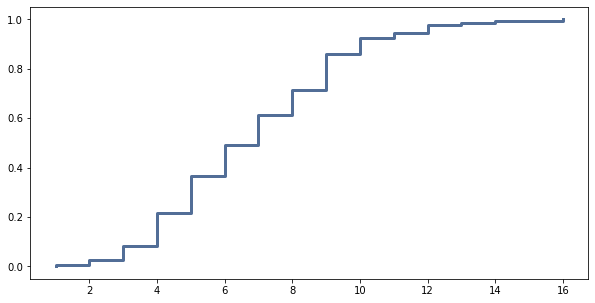

In [108]:
gdpCdf = thinkstats2.Cdf(round(np.log(dfLE["GDP Per capita"])))
thinkplot.Cdf(gdpCdf)
thinkplot.Config()

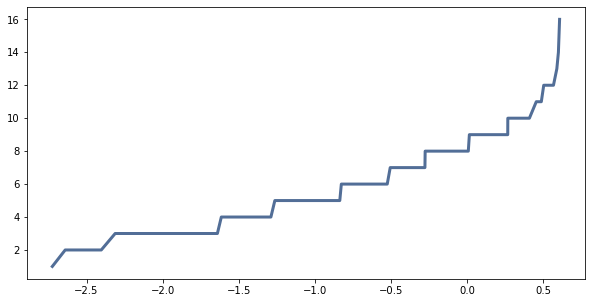

In [109]:
thinkstats2.NormalProbabilityPlot(round(np.log(dfLE["GDP Per capita"])))

In [104]:
gdpCap = gdpCap.dropna()
gdpCap.describe().apply(lambda x : format(x, 'f'))


count        144.000000
mean       69740.112787
std       561366.132621
min            1.988100
25%          112.586791
50%          744.342960
75%         6091.360633
max      6616857.431507
dtype: object

In [115]:
mu = gdpCap.mean()
sigma = gdpCap.std()
logmodel = ss.lognorm(s=sigma, scale=(mu))

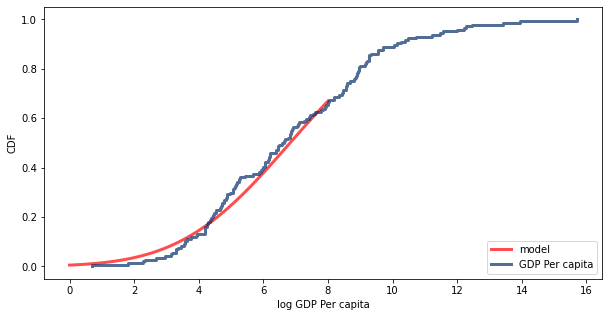

In [113]:
#Compare it to LogNormal
gdpCaplog = np.log(dfLE["GDP Per capita"])
gdpCapCdf = thinkstats2.Cdf(np.log(dfLE["GDP Per capita"]))


mu, sigma = gdpCaplog.mean(), gdpCaplog.std()
xs, ps = thinkstats2.RenderNormalCdf(mu, sigma, low=0, high=8)
thinkplot.Plot(xs, ps, label='model', color='red')
thinkplot.Cdf(gdpCapCdf, label= 'GDP Per capita') 
thinkplot.Config(xlabel='log GDP Per capita', ylabel='CDF', loc='lower right')

In [110]:
def lognormOrNorm(df1, columnName):
    k1, pNorm = ss.normaltest(df1[columnName])
    k2, pLog = ss.normaltest(np.log(df1[columnName]))
    isLog = False
    if pNorm >= pLog:
        isLog = True
    print(pNorm, pLog)
    return isLog

In [112]:
lognormOrNorm(dfLE, "GDP Per capita")

nan nan


False

The analytical function is not fitted in normal distribution. But, it is fit in lognormal distribution visually.

But, when checking with code, it is not fitted as we are getting NAN values.

Apart from that, the lognormal distribution matches only half values, from log 0 to log 8.

Therefore, it does not appear accurate. We can drop it.

In [47]:
dfLE.drop("GDP Per capita", axis=1, inplace=True)
dfLE.head()

,Country,isDeveloped,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling
0,Afghanistan,0.0,58.19375,269.0625,78.2500,0.014375,64.562500,2362.2500,15.51875,107.5625,48.3750,52.3125,340.015425,9.972260e+06,8.21250
1,Albania,0.0,75.15625,45.0625,0.6875,4.848750,98.000000,53.3750,49.06875,0.9375,98.1250,98.0625,2119.726679,6.969116e+05,12.13750
2,Algeria,0.0,73.61875,108.1875,20.3125,0.406667,78.000000,1943.8750,48.74375,23.5000,91.7500,91.8750,2847.853392,2.164983e+07,12.71250
3,Angola,0.0,49.01875,328.5625,83.7500,5.740667,70.222222,3561.3125,18.01875,132.6250,46.1250,47.6875,1975.143045,1.014710e+07,8.04375
4,AntiguaandBarbuda,0.0,75.05625,127.5000,0.0000,7.949333,98.266667,0.0000,38.42500,0.0000,96.9375,98.3125,9759.305728,NaN,8.84375


<h2>Part 4: Visually identify correlations. Separate developed and not developed countries is some way. (15pts)</h2>
<ul>
<li>5 points are for effectively and clearly showing the visualizations used to evaluate correlations.
<li>10 points are for, in the process of visualizing, remove outliers that confound correlations. List outlier "filters" you used and justify why - was the data an error, a real value that is just way out of line, or somethingn else? Remember, you're trying to find things that have correlations with each other. Looking at a correlation between home size and income may not benefit from Jeff Bezos being included. It may be helpful to look at the results and revise. 

In [68]:
dfLE.describe()

,isDeveloped,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling
count,191.000000,183.000000,183.000000,191.000000,189.000000,182.000000,191.000000,187.000000,191.000000,191.000000,191.000000,161.000000,1.440000e+02,178.000000
mean,0.167539,69.224932,164.796448,29.133835,4.486793,79.287713,2326.165576,39.117146,40.412631,82.832863,82.628740,7268.713018,1.265734e+07,12.027739
std,0.374438,9.186432,96.185159,113.691604,3.873123,17.417697,7924.050116,17.175529,154.310693,15.925330,16.433269,10743.153637,3.827961e+07,3.104852
min,0.000000,46.112500,18.750000,0.000000,0.010000,9.000000,0.000000,5.200000,0.000000,29.812500,26.812500,136.183210,2.920000e+02,1.531250
25%,0.000000,62.475000,80.406250,0.000000,1.000000,68.150000,4.781250,20.887500,0.000000,72.000000,72.375000,794.523010,9.623203e+05,9.971875
50%,0.000000,72.487500,146.562500,2.625000,3.582667,83.376068,138.937500,43.843750,3.250000,88.187500,88.500000,2847.853392,3.665163e+06,12.359375
75%,0.000000,75.106250,219.593750,21.062500,7.466000,94.687500,1501.593750,52.275000,25.281250,96.062500,96.031250,7741.748090,1.034789e+07,14.093750
max,1.000000,82.537500,550.062500,1366.687500,13.497333,99.000000,65857.937500,87.300000,1812.500000,99.000000,99.000000,57362.874601,4.214677e+08,20.037500


In [51]:
#Visualize correlations. 
isdev = dfLE[dfLE["isDeveloped"] == 1]
notdev = dfLE[dfLE["isDeveloped"] == 0]



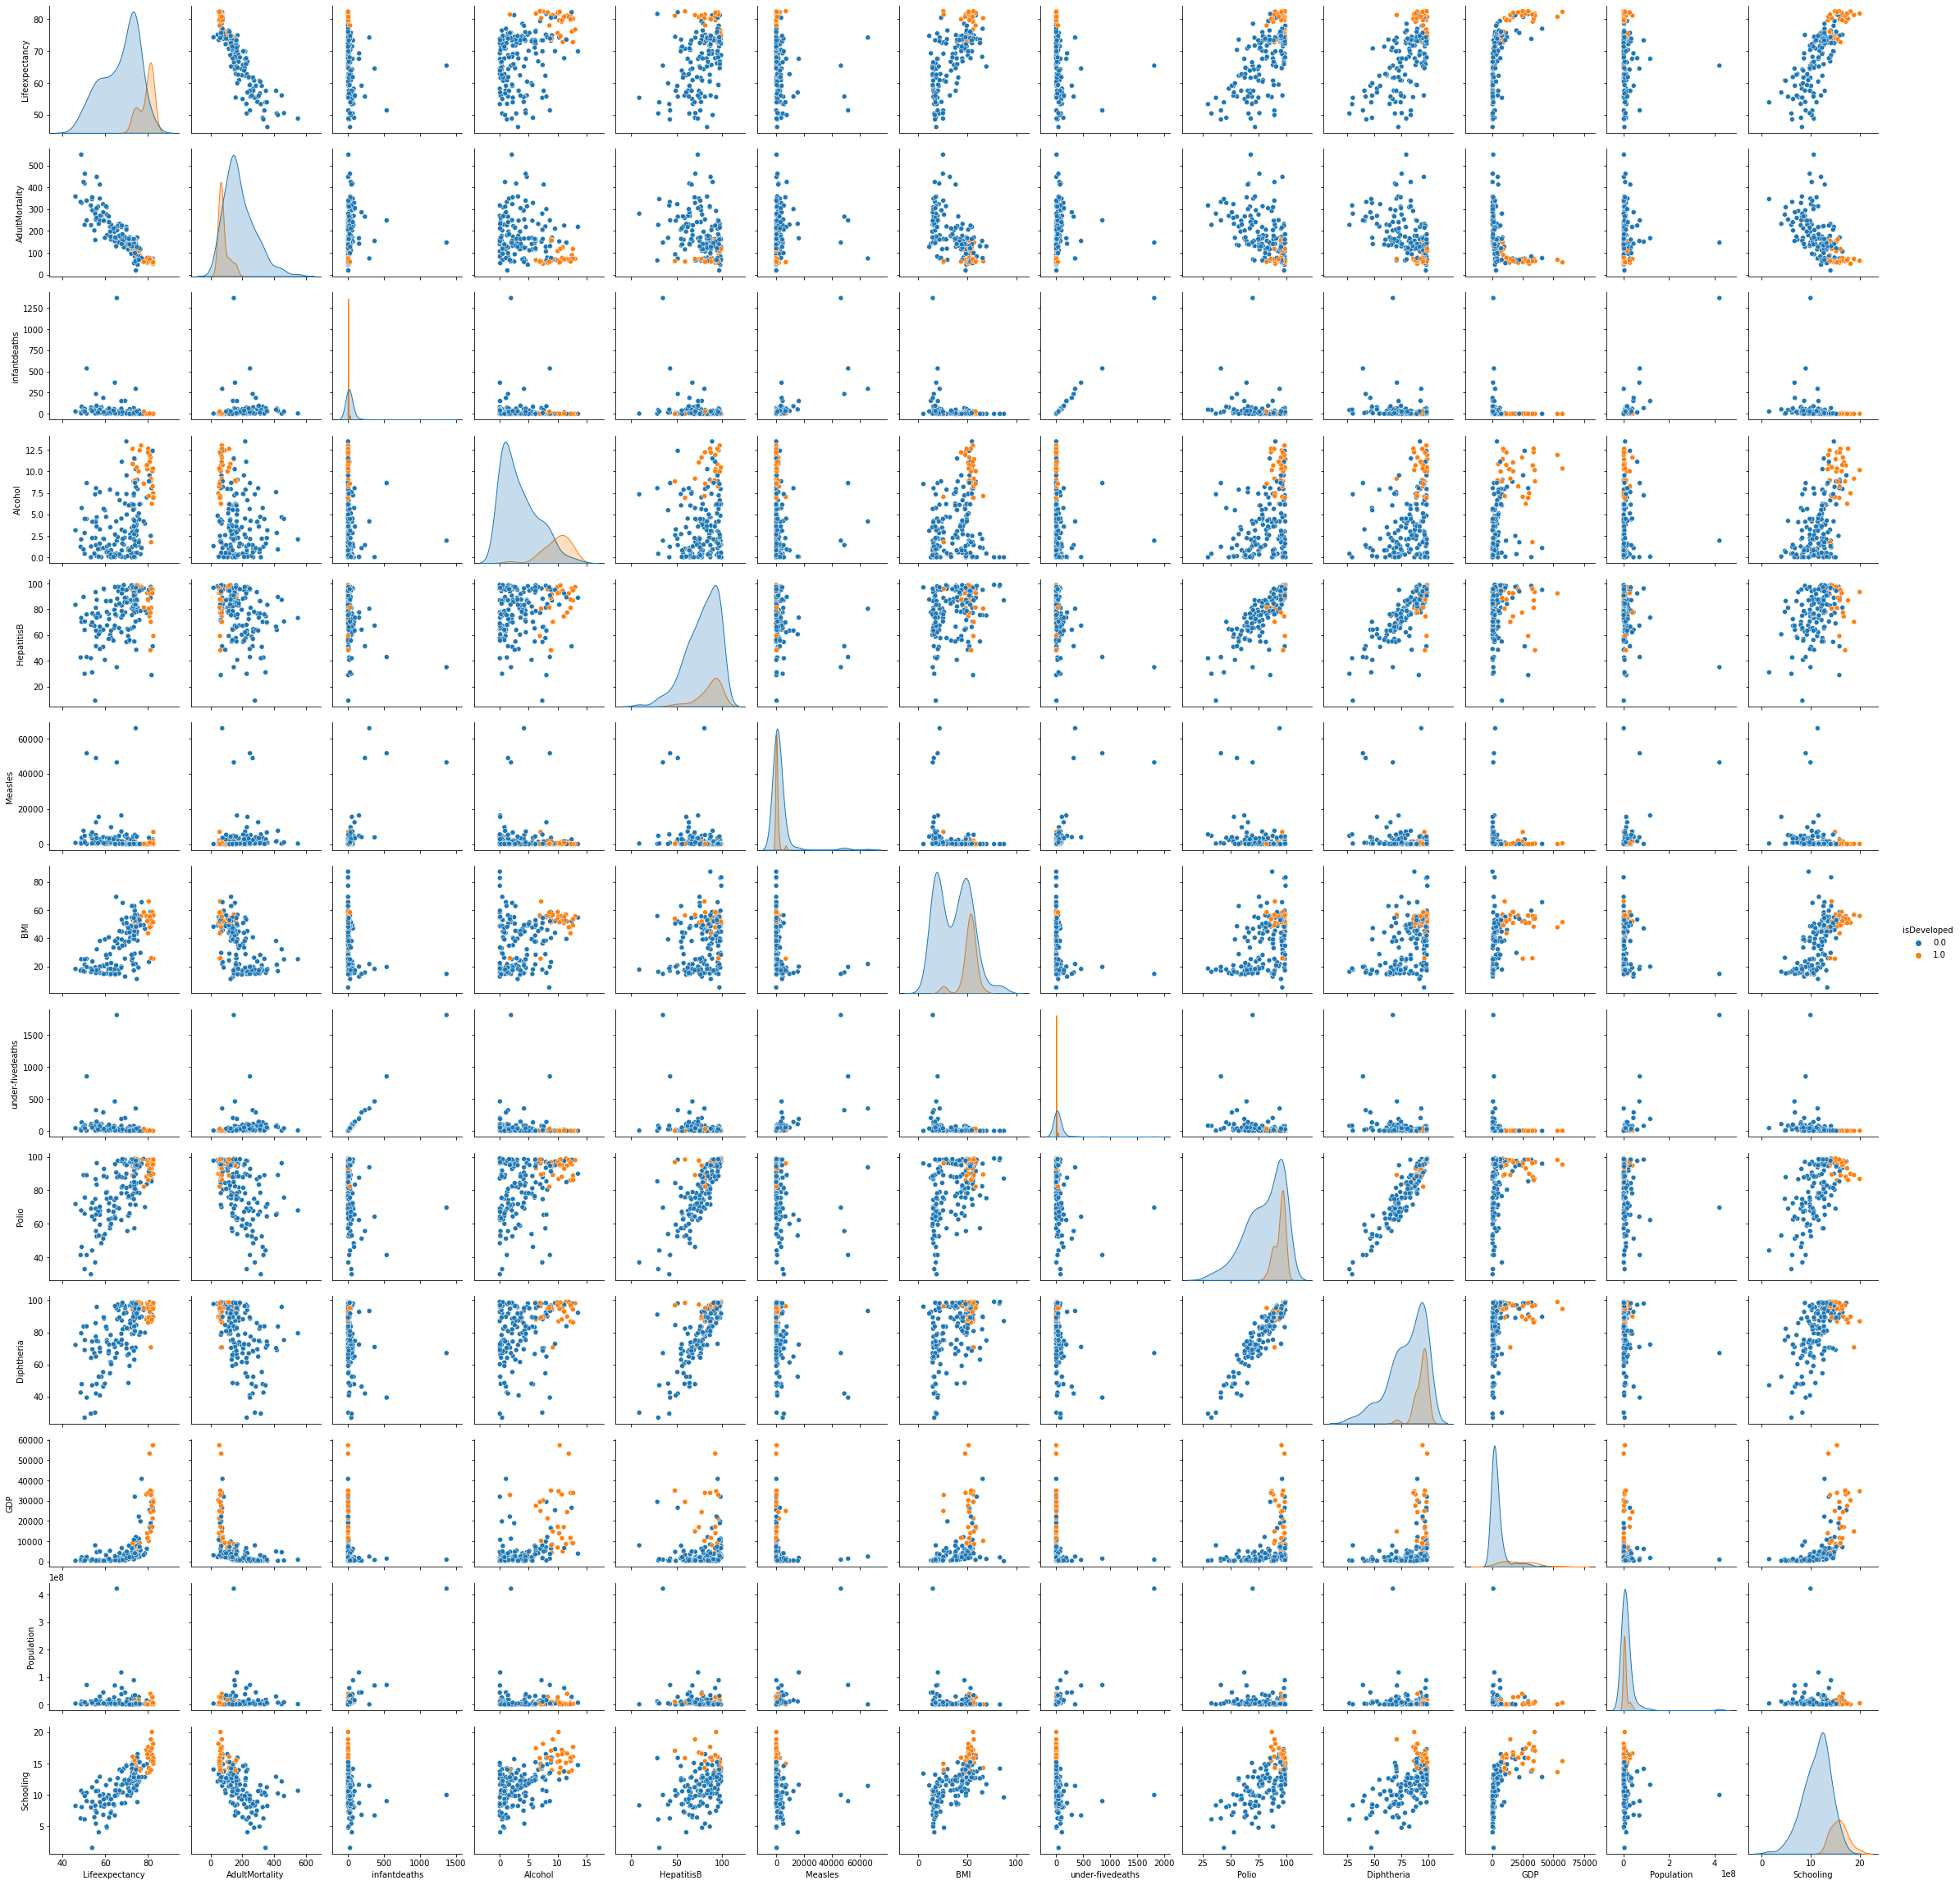

In [52]:
#Generate pairplot
sns.pairplot(dfLE, dropna=True, hue="isDeveloped")
plt.show()

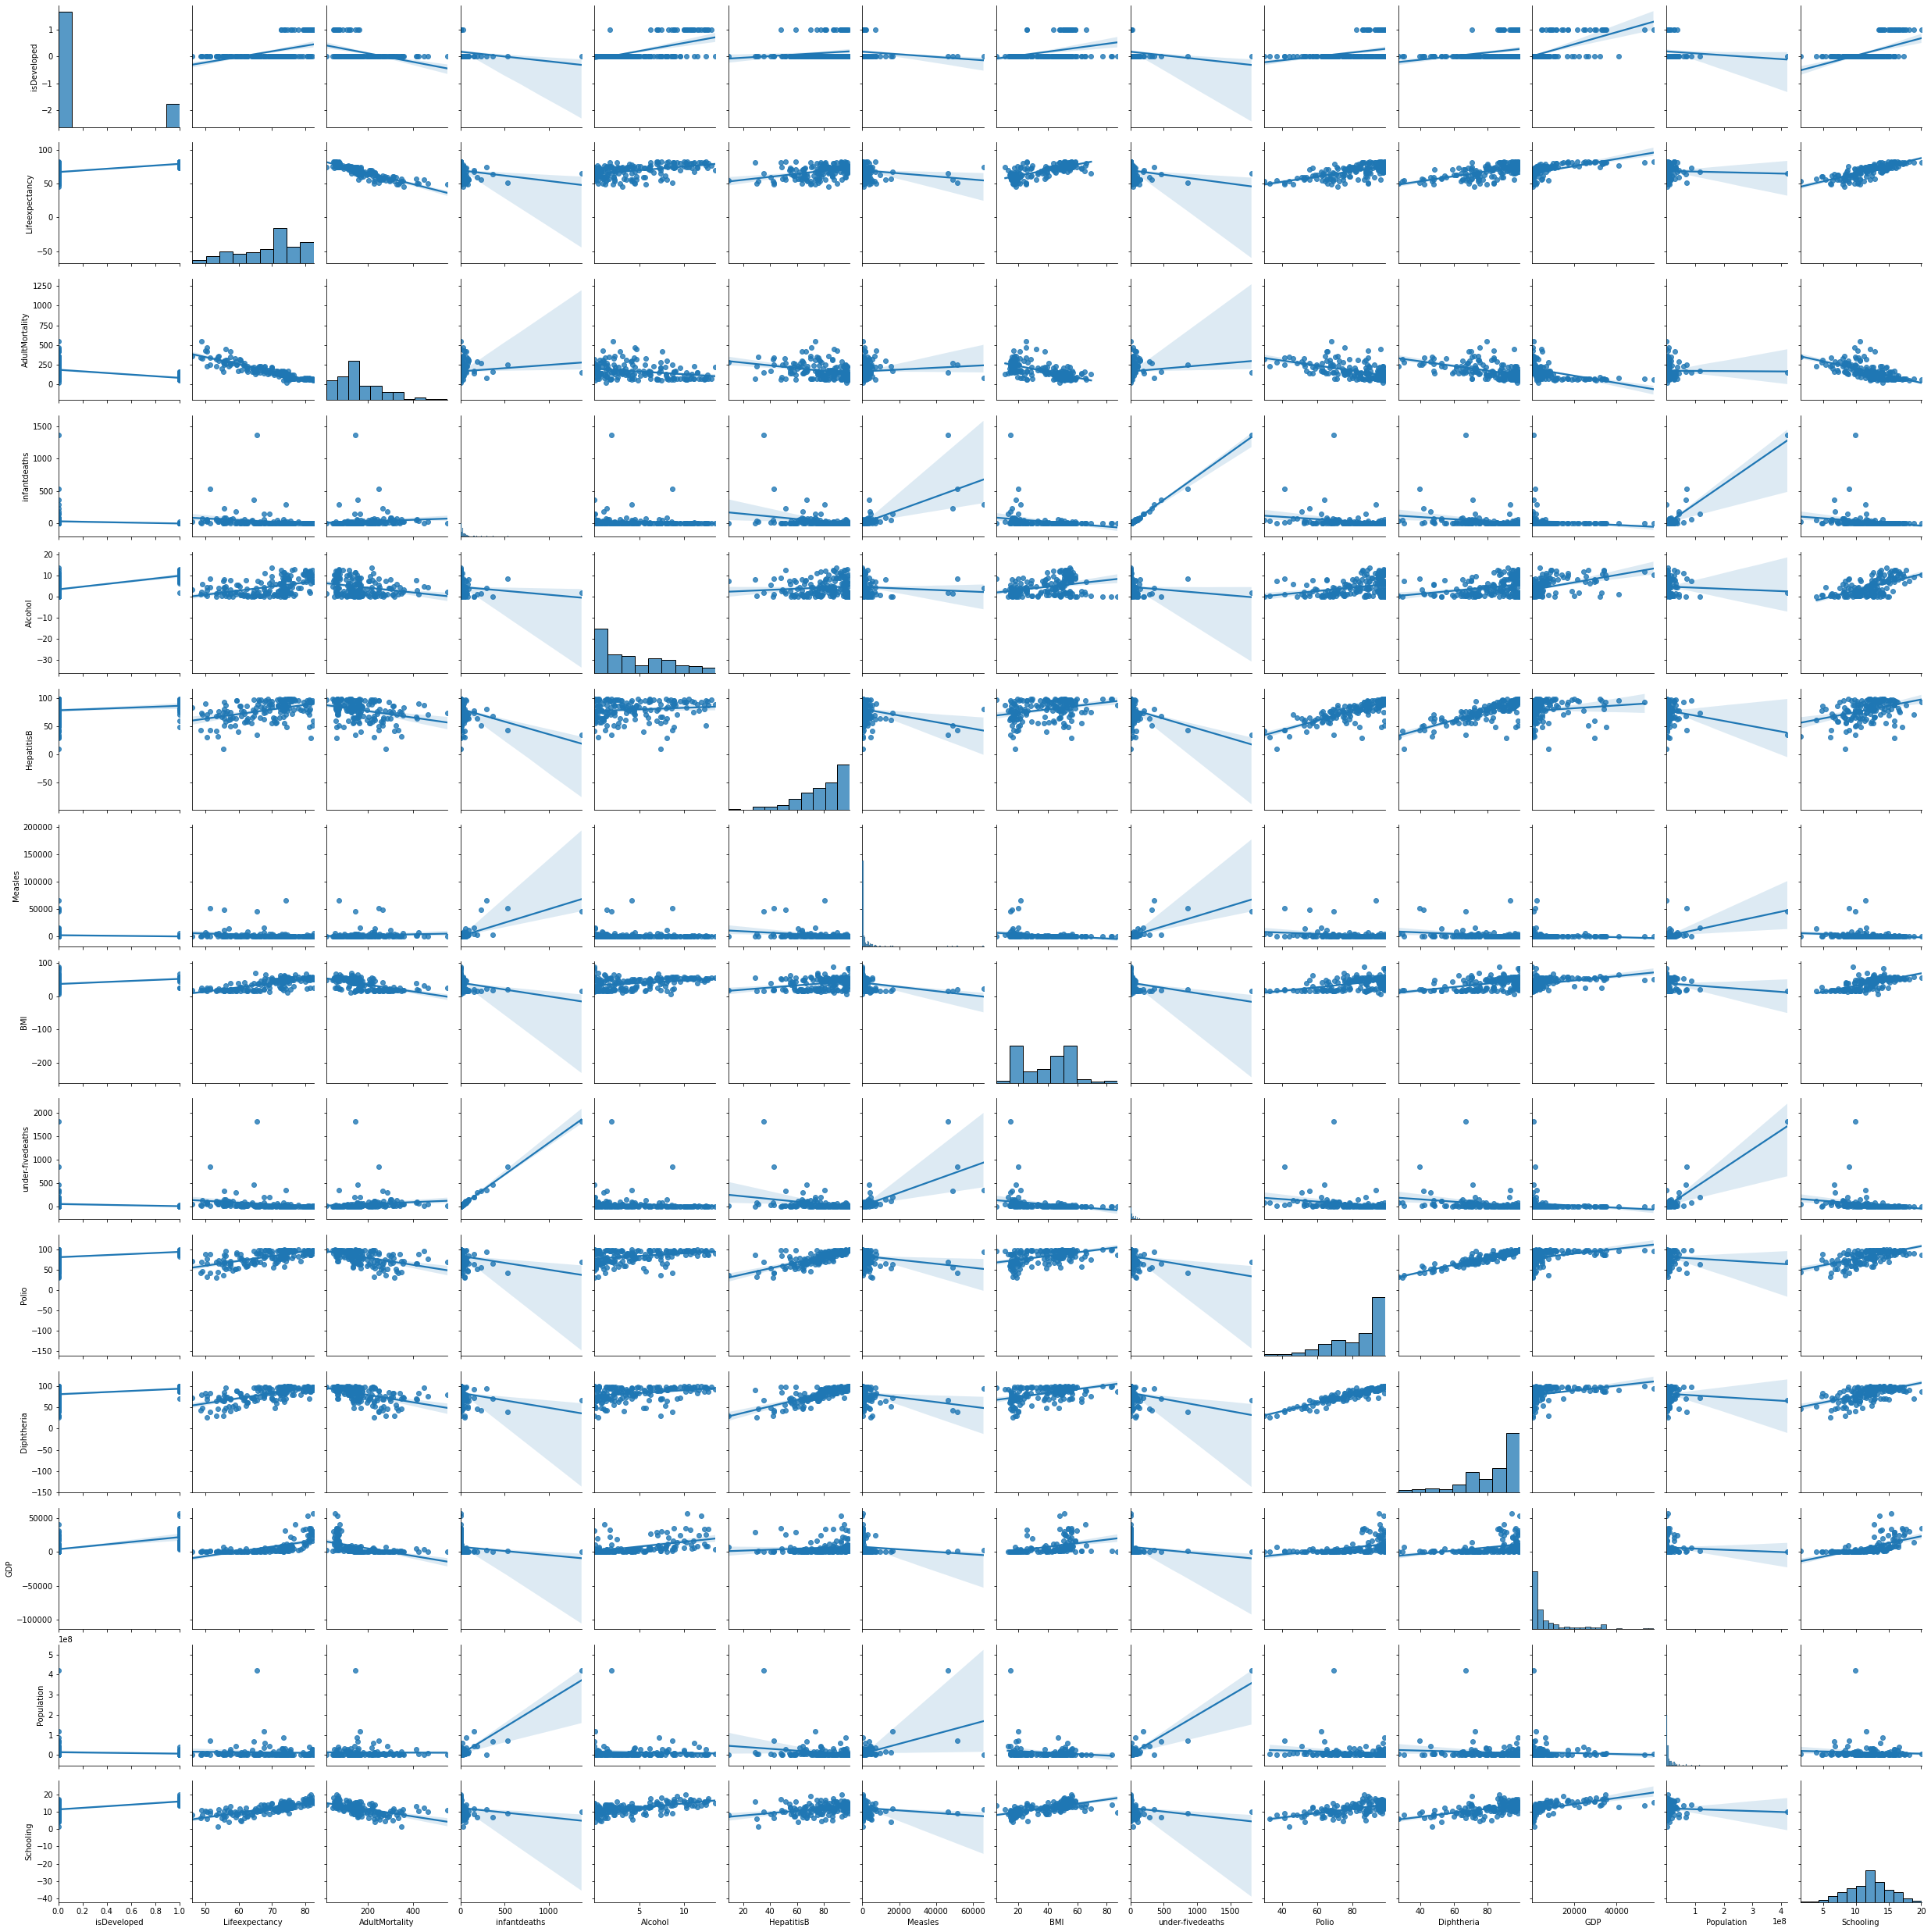

In [56]:
#Generate pairplot
sns.pairplot(dfLE, dropna=True, kind="reg")
plt.show()

<h2>Part 5: Calculate correlations (25pts)</h2>
<ul>
<li>5 points are for identifying and calculating 3 strongest correlations with life expectancy for each of developed and not developed. 
<li>10 points are for analyzing those correlations. Do they appear to be supported by reality? Do you have reason to beleive any are causal?
<li>10 points are for identifying 2 places where developing and developed countries have a substantially different relationship with respect to life expectancy, and theorizing why. What would be needed to confirm your thoughts?

<b>Please put your written parts in markdown cells, with a little formatting to make them readable. 

In [132]:
#Calculate correlations and analyze. 
isdev = dfLE[dfLE["isDeveloped"] == 1]
notdev = dfLE[dfLE["isDeveloped"] == 0]
isdev = isdev.dropna()
notdev = notdev.dropna()


In [120]:
def multiCorr(df1, columnName1, columnName2, spearman=False):
    finalCorr = -999
    if spearman == True:
        finalCorr = thinkstats2.SpearmanCorr(df1[columnName1], df1[columnName2])
    if spearman == False:
        finalCorr = thinkstats2.Corr(df1[columnName1], df1[columnName2])
    return finalCorr

<h1>Spearmann correlations of Lifeexpectancy of Developed Countries </h1>

In [128]:
print( "isDeveloped: ", multiCorr(isdev, "Lifeexpectancy", "isDeveloped", spearman=True))
print("AdultMortality: ", multiCorr(isdev, "Lifeexpectancy", "AdultMortality", spearman=True))
print("infantdeaths: ", multiCorr(isdev, "Lifeexpectancy", "infantdeaths", spearman=True))
print("Alcohol: ", multiCorr(isdev, "Lifeexpectancy", "Alcohol", spearman=True))
print("HepatitisB: ", multiCorr(isdev, "Lifeexpectancy", "HepatitisB", spearman=True))
print("Measles: ", multiCorr(isdev, "Lifeexpectancy", "Measles", spearman=True))
print("BMI: ", multiCorr(isdev, "Lifeexpectancy", "BMI", spearman=True))
print("under-fivedeaths: ", multiCorr(isdev, "Lifeexpectancy", "under-fivedeaths", spearman=True))
print("Polio: ", multiCorr(isdev, "Lifeexpectancy", "Polio", spearman=True))
print("Diphtheria: ", multiCorr(isdev, "Lifeexpectancy", "Diphtheria", spearman=True))
print("GDP: ", multiCorr(isdev, "Lifeexpectancy", "GDP", spearman=True))
print("Population: ", multiCorr(isdev, "Lifeexpectancy", "Population", spearman=True))
print("Schooling: ", multiCorr(isdev, "Lifeexpectancy", "Schooling", spearman=True))


isDeveloped:  nan
AdultMortality:  -0.6701754385964912
infantdeaths:  0.15308915522615932
Alcohol:  -0.3087719298245614
HepatitisB:  -0.3859649122807018
Measles:  0.24035087719298245
BMI:  0.3701754385964912
under-fivedeaths:  0.16175726732927515
Polio:  0.2316805839532434
Diphtheria:  -0.007898201725678752
GDP:  0.7666666666666667
Population:  0.39649122807017545
Schooling:  0.4052631578947368


d:\repos\3450_Asn2_Students\thinkstats2.py:2589: RuntimeWarning: invalid value encountered in double_scalars
  corr = Cov(xs, ys, meanx, meany) / math.sqrt(varx * vary)


<h2>3 strongest correlations with Lifeexpectancy of Developed countries: </h2>
<ul>
<li><b>GDP</b>:  0.7666666666666667
<li><b>Schooling</b>:  0.4052631578947368
<li><b>Population</b>:  0.39649122807017545
</ul>
GDP, Schooling and population is strongly related to life expectancy.

In developed countries, quality of life is better as they have high GDP. They are more care about hygiene and health, since schooling is also high.  

The factors that are not supporting to normal evaluations are the positive correlation of life expectancy with 
<li><b>infant deaths
<li>Measles
<li>Polio
<li>Under-five deaths</b>

These are factors that tend to negatively affect life expectancy. But, in case of developed countries, they are having an opposite correlation.

<h1>Spearmann correlations of Lifeexpectancy of Non-Developed Countries </h1>

In [135]:
print( "isDeveloped: ", multiCorr(notdev, "Lifeexpectancy", "isDeveloped", spearman=True))
print("AdultMortality: ", multiCorr(notdev, "Lifeexpectancy", "AdultMortality", spearman=True))
print("infantdeaths: ", multiCorr(notdev, "Lifeexpectancy", "infantdeaths", spearman=True))
print("Alcohol: ", multiCorr(notdev, "Lifeexpectancy", "Alcohol", spearman=True))
print("HepatitisB: ", multiCorr(notdev, "Lifeexpectancy", "HepatitisB", spearman=True))
print("Measles: ", multiCorr(notdev, "Lifeexpectancy", "Measles", spearman=True))
print("BMI: ", multiCorr(notdev, "Lifeexpectancy", "BMI", spearman=True))
print("under-fivedeaths: ", multiCorr(notdev, "Lifeexpectancy", "under-fivedeaths", spearman=True))
print("Polio: ", multiCorr(notdev, "Lifeexpectancy", "Polio", spearman=True))
print("Diphtheria: ", multiCorr(notdev, "Lifeexpectancy", "Diphtheria", spearman=True))
print("GDP: ", multiCorr(notdev, "Lifeexpectancy", "GDP", spearman=True))
print("Population: ", multiCorr(notdev, "Lifeexpectancy", "Population", spearman=True))
print("Schooling: ", multiCorr(notdev, "Lifeexpectancy", "Schooling", spearman=True))

isDeveloped:  nan
AdultMortality:  -0.8903644931560614
infantdeaths:  -0.49697613156590514
Alcohol:  0.26730632148527367
HepatitisB:  0.350428613991034
Measles:  -0.45920335262658074
BMI:  0.7149606426791004
under-fivedeaths:  -0.5297148843567684
Polio:  0.5667673154544081
Diphtheria:  0.575259214332278
GDP:  0.6957507862365904
Population:  -0.12316097924526427
Schooling:  0.760547179568718


d:\repos\3450_Asn2_Students\thinkstats2.py:2589: RuntimeWarning: invalid value encountered in double_scalars
  corr = Cov(xs, ys, meanx, meany) / math.sqrt(varx * vary)


<h2>3 strongest correlations with Lifeexpectancy of Non-Developed countries: </h2>
<ul>
<li><b>Schooling</b>:  0.760547179568718
<li><b>GDP</b>:  0.6957507862365904
<li><b>BMI</b>:  0.7149606426791004
</ul>
From the Spearmann correlation, Schooling, GDP and BMI are the 3 strongest correlations in non-developed countries.

More schooling provided, better will be their knowledge and better will be their living standard. Thus, schooling is highly correlated to life expectancy. So do the GDP and BMI.
 
However, higher BMI may be confusing to lower life expectancy. Here, we consider non-developed countries. Compared to their lower GDP, they may have lower health. There may be chances of very lower BMI. Hence, for non-developed nations, BMI will have more relation to life expectancy.

The factors that are not supporting to normal evaluations are the positive correlation of life expectancy with 
<li><b>alcohol
<li>HepatitisB
<li>Polio
<li>Diphtheria</b>

These are factors that tend to negatively affect life expectancy. But, in case of non-developed countries, they are having an opposite correlation.